<a href="https://colab.research.google.com/github/CorletteN/Autolib-France-Data/blob/main/Moringa_School_Corlette_Nyaundi_Wk_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [24]:
# Import the necessary python libraries
import pandas as pd
import numpy as np


In [25]:
#Upload datasets into environment and create dataframe
df = pd.read_csv('Autolib_dataset.csv')

# **1.0 Reading Dataset from CSV**

The data and the dataset description for this Independent project is available [http://bit.ly/autolib_dataset (Links to an external site.)] and here respectively [Link] 
Description: The dataset contains data collected for a period of 9 days.

In [26]:
#Upload datasets into environment, read the data from CSV and create dataframe
df = pd.read_csv('/content/Autolib_dataset.csv')

# **1.1 Dataset Preview**

In [27]:
#Confirm dataset
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


# **1.2 Get to know the dataset**



In [28]:
# We know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [29]:
df.shape

(5000, 25)

# **1.3 Let's get cleaning**

####1.3.1 Validity

In [30]:
#We start by dropping irrelevant columns
df.drop(['Charge Slots','Charging Status','ID','Displayed comment','Scheduled at', 'Slots','Geo point'], axis = 1, inplace = True)
df


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,Colombes,STATION,92700,Colombes/MÃ©nelotte/8,operational,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,Paris,STATION,75015,Paris/Dantzig/37,operational,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,Paris,STATION,75007,Paris/Bac/142,operational,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,Fontenay-Sous-Bois,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,nonexistent,2018,4,4,17,27


In [31]:
#Drop some more columns that are irrelevant to our current analysis
df.drop(['Cars', 'Public name','Status', 'Subscription status'],axis= 1, inplace = True)
df

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Rental status,Station type,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,STATION,75015,operational,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,STATION,75014,operational,station,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,STATION,93350,operational,station,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,STATION,75013,operational,station,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,PARKING,75017,operational,station,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,STATION,92700,operational,station,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,STATION,75015,operational,station,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,STATION,75007,operational,station,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,STATION,94120,operational,station,2018,4,4,17,27


####1.3.2 Accuracy & Uniformity

In [32]:
#Fix syntax errors
df.columns = df.columns.str.strip().str.replace(' ','_')
df.columns

Index(['Address', 'Bluecar_counter', 'Utilib_counter', 'Utilib_1.4_counter',
       'City', 'Kind', 'Postal_code', 'Rental_status', 'Station_type', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [33]:
#Change all column names to lower case
df.columns = map(str.lower, df.columns)
df.columns

Index(['address', 'bluecar_counter', 'utilib_counter', 'utilib_1.4_counter',
       'city', 'kind', 'postal_code', 'rental_status', 'station_type', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [34]:
len(df['address'].unique().tolist())

1104

###1.3.3 Completeness

In [35]:
#Check for null values
df.isnull().any()

address               False
bluecar_counter       False
utilib_counter        False
utilib_1.4_counter    False
city                  False
kind                  False
postal_code           False
rental_status         False
station_type          False
year                  False
month                 False
day                   False
hour                  False
minute                False
dtype: bool

###1.3.4 Consistency

In [36]:
#Check for duplicated rows
df.duplicated()
# and drop if any
df.drop_duplicates()
#There were no duplicates in this dataset

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,rental_status,station_type,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,Paris,STATION,75015,operational,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,Paris,STATION,75014,operational,station,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,STATION,93350,operational,station,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,STATION,75013,operational,station,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,Paris,PARKING,75017,operational,station,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,Colombes,STATION,92700,operational,station,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,Paris,STATION,75015,operational,station,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,Paris,STATION,75007,operational,station,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,Fontenay-Sous-Bois,STATION,94120,operational,station,2018,4,4,17,27


###1.3.5 Datetime conversion

In [37]:
#We will need to convert the time data into datetime format
#Start by importing the datetime module
from datetime import datetime

#combining the year, month, day, hour, minute into one column

df['timestamp']= pd.to_datetime(df[['month', 'day', 'year','hour','minute']])
df.head()


,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,rental_status,station_type,year,month,day,hour,minute,timestamp
0,2 Avenue de Suffren,0,0,0,Paris,STATION,75015,operational,station,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,STATION,75014,operational,station,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,STATION,93350,operational,station,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,STATION,75013,operational,station,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,PARKING,75017,operational,station,2018,4,8,17,23,2018-04-08 17:23:00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   address             5000 non-null   object        
 1   bluecar_counter     5000 non-null   int64         
 2   utilib_counter      5000 non-null   int64         
 3   utilib_1.4_counter  5000 non-null   int64         
 4   city                5000 non-null   object        
 5   kind                5000 non-null   object        
 6   postal_code         5000 non-null   int64         
 7   rental_status       5000 non-null   object        
 8   station_type        5000 non-null   object        
 9   year                5000 non-null   int64         
 10  month               5000 non-null   int64         
 11  day                 5000 non-null   int64         
 12  hour                5000 non-null   int64         
 13  minute              5000 non-null   int64       

In [39]:
df.columns

Index(['address', 'bluecar_counter', 'utilib_counter', 'utilib_1.4_counter',
       'city', 'kind', 'postal_code', 'rental_status', 'station_type', 'year',
       'month', 'day', 'hour', 'minute', 'timestamp'],
      dtype='object')

In [40]:
#Create new dataset excluding the irrelevant columns
df_clean = df.drop(['year','month', 'day', 'minute'], axis=1)
df_clean.head()

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,rental_status,station_type,hour,timestamp
0,2 Avenue de Suffren,0,0,0,Paris,STATION,75015,operational,station,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,STATION,75014,operational,station,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,Le Bourget,STATION,93350,operational,station,20,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,STATION,75013,operational,station,4,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,PARKING,75017,operational,station,17,2018-04-08 17:23:00


###1.4 Export the Clean Dataset

In [41]:
df_clean.to_csv('Autolib_clean.csv')

###1.5 Answering Questions using python

In [42]:
#Set it to only  cover the month of April
# Common sense: code unnecessary because the data covers only day 1 to day 9 of April 2018 thus all data falls within April


###1.5.1 Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

######To do this we first sort the list by datetime then create a column with the running difference of the bluecar_counter
######If the difference is negative, then a car was picked up, if positive then a car was returned, if it stays the same, then nothing happened
######The magnitude of the difference tells us how many cars were picked/returned

In [43]:
#subsetting the data frame to only select only stations in Paris
df_paris = df_clean[(df_clean.city == 'Paris')]
df_paris

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,rental_status,station_type,hour,timestamp
0,2 Avenue de Suffren,0,0,0,Paris,STATION,75015,operational,station,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,Paris,STATION,75014,operational,station,7,2018-04-06 07:24:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,Paris,STATION,75013,operational,station,4,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,Paris,PARKING,75017,operational,station,17,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,Paris,STATION,75011,operational,station,7,2018-04-06 07:02:00
...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,Paris,STATION,75013,operational,station,23,2018-04-09 23:01:00
4994,15 rue de Rocroy,0,0,0,Paris,STATION,75010,operational,station,20,2018-04-01 20:49:00
4996,37 rue de Dantzig,4,0,0,Paris,STATION,75015,operational,station,16,2018-04-04 16:56:00
4997,142 rue du Bac,1,0,0,Paris,STATION,75007,operational,station,7,2018-04-01 07:01:00


In [44]:
df2_paris = df_paris.drop(['address', 'utilib_counter', 'utilib_1.4_counter',
       'city', 'kind', 'postal_code', 'rental_status', 'station_type',
       'timestamp'], axis=1)
df2_paris 

,bluecar_counter,hour
0,0,11
1,6,7
3,3,4
4,3,17
5,0,7
...,...,...
4992,0,23
4994,0,20
4996,4,16
4997,1,7


In [45]:
#Create a dataset that lists each hour
data = {'time': (df['hour'].unique().tolist())}
df4_paris = pd.DataFrame(data)
#Add a column that sums up the number of bluecars at the station at any given hour
df4_paris['bc_total'] = df2_paris.groupby('hour')['bluecar_counter'].sum()
df4_paris = df4_paris.sort_values(by=['time','bc_total'])
#Create dataset that shows the number of bluecars at all Paris stations each hour
df5_paris = pd.DataFrame(df4_paris)
df5_paris.reset_index(drop=True, inplace=True)
df5_paris

,time,bc_total
0,0,250
1,1,192
2,2,187
3,3,218
4,4,242
5,5,191
6,6,163
7,7,207
8,8,201
9,9,234


In [46]:
print(df5_paris.dtypes)

time        int64
bc_total    int64
dtype: object


In [47]:
#Compute the running difference to find out how many cars were picked, returned or nothing happened
df5_paris['neg'] = df5_paris.bc_total.diff()
df5_paris

,time,bc_total,neg
0,0,250,NaN
1,1,192,-58.0
2,2,187,-5.0
3,3,218,31.0
4,4,242,24.0
5,5,191,-51.0
6,6,163,-28.0
7,7,207,44.0
8,8,201,-6.0
9,9,234,33.0


# Data Visualization

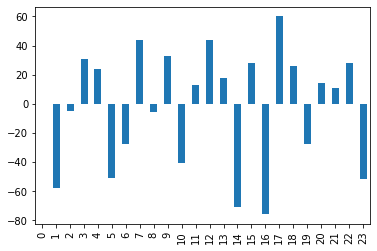

In [48]:
df5_paris.bc_total.diff().plot(kind = 'bar')

####1.5.2 Bonus Questions

#### 1.5.2.1 What is the most popular hour for returning cars?

In [49]:
#Time with highest difference
df5_paris['neg'].max()
df5_paris.loc[17]

time         17.0
bc_total    209.0
neg          60.0
Name: 17, dtype: float64